In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('AirPassengers.csv')

In [33]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [34]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
data.shape

(144, 2)

In [5]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
data.index = data['Month']
data.head()
del data['Month']

In [8]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Text(0, 0.5, 'Number of Passengers')

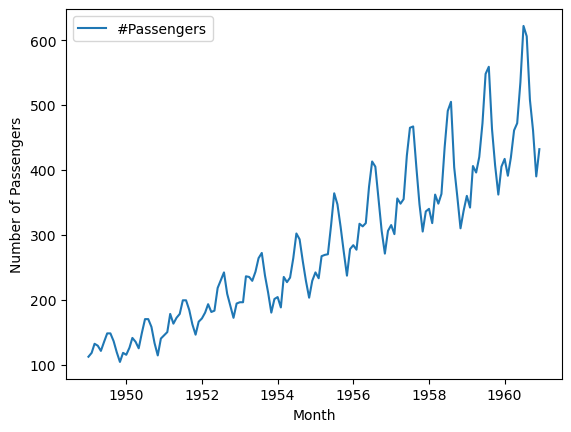

In [9]:
sns.lineplot(data)
plt.ylabel('Number of Passengers')

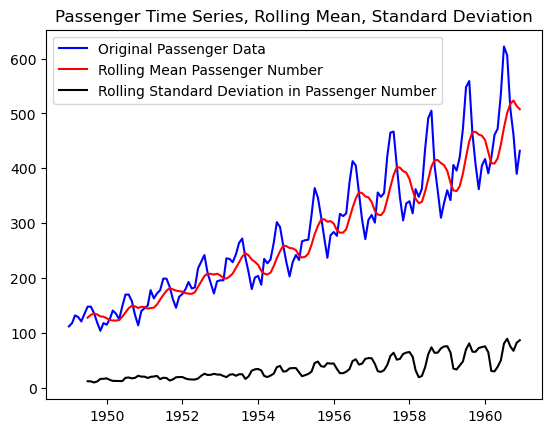

In [10]:
rolling_mean = data.rolling(7).mean()
rolling_std = data.rolling(7).std()

plt.plot(data, color="blue",label="Original Passenger Data")

plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")

plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")

plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")

plt.legend(loc="best")

In [11]:
from statsmodels.tsa.stattools import adfuller

adft = adfuller(data,autolag="AIC")


output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

       Values                       Metric
0    0.815369              Test Statistics
1    0.991880                      p-value
2   13.000000             No. of lags used
3  130.000000  Number of observations used
4   -3.481682          critical value (1%)
5   -2.884042          critical value (5%)
6   -2.578770         critical value (10%)


# Non-Stationary Time series

In [12]:
# Trend (Days)
# Seasonal Variation (months)
# cyclic variation (1 year +)
# Random fluctuation

In [14]:
autocorrelation_lag1 = data['#Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.9601946480498523


In [15]:
autocorrelation_lag3 = data['#Passengers'].autocorr(lag=3)
print("One Month Lag: ", autocorrelation_lag3)

One Month Lag:  0.837394765081794


In [16]:
autocorrelation_lag6 = data['#Passengers'].autocorr(lag=6)
print("One Month Lag: ", autocorrelation_lag6)

One Month Lag:  0.7839187959206183


In [17]:
autocorrelation_lag9 = data['#Passengers'].autocorr(lag=9)
print("One Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.8278519011167601


In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose 

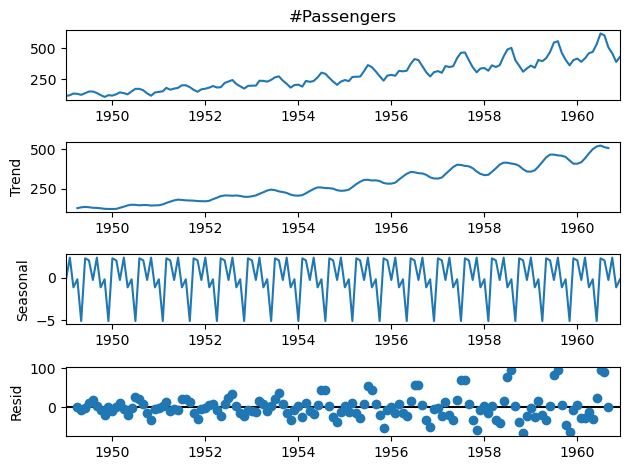

In [20]:
decompose = seasonal_decompose(data['#Passengers'],model='additive', period=7)
decompose.plot()
plt.show()

C:\Users\kdeep\AppData\Local\Temp\ipykernel_31500\209452659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['#Passengers']
C:\Users\kdeep\AppData\Local\Temp\ipykernel_31500\209452659.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['#Passengers']


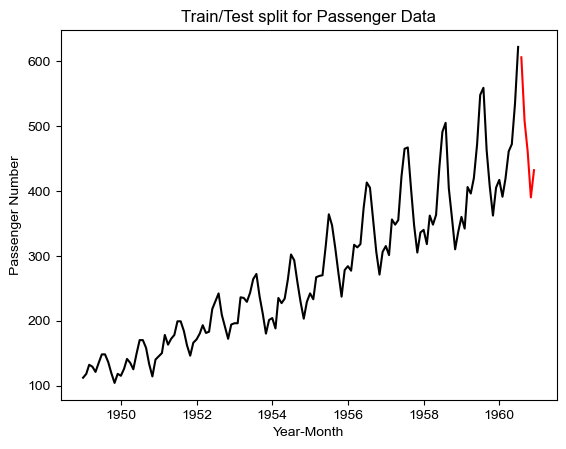

In [22]:
data['Date'] = data.index
train = data[data['Date'] < pd.to_datetime("1960-08", format='%Y-%m')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']
test = data[data['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

In [25]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  61.364461850550356


In [28]:
forecast

,Prediction
Month,
1960-08-01,609.537778
1960-09-01,569.573014
1960-10-01,524.517111
1960-11-01,483.041394
1960-12-01,480.302273


In [35]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [ ]:
# Timeseries ways to make stationary
"""1. Differencing
   2. Logarithmic Transformation
   3. Moving Average Smoothing
   4. De-Trending
   5. De-Seasonalizing"""

# Mean not constant show trend use defferencing
# Variance not constant show seasonality using logrithmic
# show Auto-Correlation showing seasonality using Moving Average

In [ ]:
# How to judge Autocorrelation ? using ACF function
# Partial autocorrelation: finding corelation b/w Time series & its lagged version

In [ ]:
# Auto Regression
# Predicting value of a variable based on its own previous variable

Classical methods to study Time series:
    1. AR
    2. MA
    3. ARMA
    4. ARIMA